# 下载MMPose

In [ ]:
# 从 github 上下载最新的 mmpose 源代码
!git clone https://ghproxy.com/https://github.com/open-mmlab/mmpose.git -b tutorial2023

# 安装MMPose

In [1]:
import os
os.chdir('mmpose')
!pip install -v -e .

# 下载耳朵数据集放置到创建的data目录下

In [ ]:
# 创建 checkpoint 文件夹，用于存放预训练模型权重文件
os.mkdir('checkpoint')

# 创建 outputs 文件夹，用于存放预测结果
os.mkdir('outputs')

# 创建 data 文件夹，用于存放图片和视频素材
os.mkdir('data')

# 训练

In [2]:
%pip install -U albumentations
!python tools/train.py data/rtmpose-s-ear.py

Note: you may need to restart the kernel to use updated packages.
06/05 10:46:38 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 21
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04.1) 11.3.0
    PyTorch: 2.0.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencod

# 在测试集上评估模型精度

In [3]:
!python tools/test.py data/rtmpose-s-ear.py \
                      work_dirs/rtmpose-s-ear/epoch_300.pth

06/05 16:02:23 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 21
    GPU 0: NVIDIA GeForce RTX 3060
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04.1) 11.3.0
    PyTorch: 2.0.1
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-

# 导入工具包

In [4]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

# 载入训练日志

In [5]:
log_path = 'work_dirs/rtmpose-s-ear/20230605_104637/vis_data/scalars.json'

In [6]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [7]:
len(json_list)

930

In [8]:
eval(json_list[4])

{'lr': 0.0008421368421052633,
 'data_time': 7.561894226074219,
 'loss': 0.767623770236969,
 'loss_kpt': 0.767623770236969,
 'acc_pose': 0.08632133408919122,
 'time': 7.941681051254273,
 'epoch': 2,
 'iter': 5,
 'memory': 3045,
 'step': 5}

In [9]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in tqdm(json_list):
    if 'coco/AP' in each:
        df_test = df_test._append(eval(each), ignore_index=True)
    else:
        df_train = df_train._append(eval(each), ignore_index=True)

100%|██████████| 930/930 [00:00<00:00, 3577.73it/s]


In [10]:
df_train

,lr,data_time,loss,loss_kpt,acc_pose,time,epoch,iter,memory,step
0,4.000000e-08,8.924292,0.844231,0.844231,0.009673,10.182172,1.0,1.0,2984.0,1.0
1,2.105642e-04,8.083500,0.844642,0.844642,0.008185,8.796217,1.0,2.0,3045.0,2.0
2,4.210884e-04,7.051294,0.738825,0.738825,0.020238,7.575042,1.0,3.0,2007.0,3.0
3,6.316126e-04,7.410890,0.762051,0.762051,0.046131,7.844684,2.0,4.0,3045.0,4.0
4,8.421368e-04,7.561894,0.767624,0.767624,0.086321,7.941681,2.0,5.0,3045.0,5.0
...,...,...,...,...,...,...,...,...,...,...
895,2.011574e-04,7.582054,0.139264,0.139264,0.991071,7.729099,299.0,896.0,3045.0,896.0
896,2.007408e-04,7.510683,0.137675,0.137675,0.989286,7.656566,299.0,897.0,2007.0,897.0
897,2.004167e-04,7.515307,0.137484,0.137484,0.982143,7.661185,300.0,898.0,3045.0,898.0
898,2.001852e-04,7.583972,0.138922,0.138922,0.975423,7.730967,300.0,899.0,3045.0,899.0


In [11]:
df_test

,coco/AP,coco/AP .5,coco/AP .75,coco/AP (M),coco/AP (L),coco/AR,coco/AR .5,coco/AR .75,coco/AR (M),coco/AR (L),PCK,AUC,NME,data_time,time,step
0,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.072562,0.000454,0.365960,0.771479,0.800436,10.0
1,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.272109,0.008163,0.273377,0.683029,0.701606,20.0
2,0.000774,0.004770,0.000000,-1.0,0.000774,0.007143,0.047619,0.000000,-1.0,0.007143,0.311791,0.010884,0.236026,0.684230,0.696068,30.0
3,0.000096,0.000958,0.000000,-1.0,0.000096,0.002381,0.023810,0.000000,-1.0,0.002381,0.339002,0.011848,0.241261,0.685270,0.696540,40.0
4,0.000186,0.001856,0.000000,-1.0,0.000186,0.002381,0.023810,0.000000,-1.0,0.002381,0.352608,0.007200,0.229794,0.681882,0.693287,50.0
5,0.000000,0.000000,0.000000,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,0.000000,0.300454,0.006916,0.285718,0.683856,0.695954,60.0
6,0.000390,0.003000,0.000000,-1.0,0.000390,0.007143,0.047619,0.000000,-1.0,0.007143,0.362812,0.013265,0.239186,0.685730,0.697834,70.0
7,0.000371,0.003713,0.000000,-1.0,0.000371,0.002381,0.023810,0.000000,-1.0,0.002381,0.361678,0.013322,0.242386,0.691894,0.703767,80.0
8,0.010520,0.050743,0.000000,-1.0,0.010520,0.016667,0.071429,0.000000,-1.0,0.016667,0.321995,0.006973,0.202886,0.687987,0.700018,90.0
9,0.059693,0.330835,0.000000,-1.0,0.059693,0.102381,0.476190,0.000000,-1.0,0.102381,0.510204,0.017800,0.130990,0.685048,0.697110,100.0


# 导出训练日志表格

In [12]:
df_train.to_csv('训练日志-训练集.csv', index=False)
df_test.to_csv('训练日志-测试集.csv', index=False)

# 可视化辅助函数

In [13]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

# 训练集损失函数

In [14]:
df_train.columns

Index(['lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time', 'epoch',
       'iter', 'memory', 'step'],
      dtype='object')

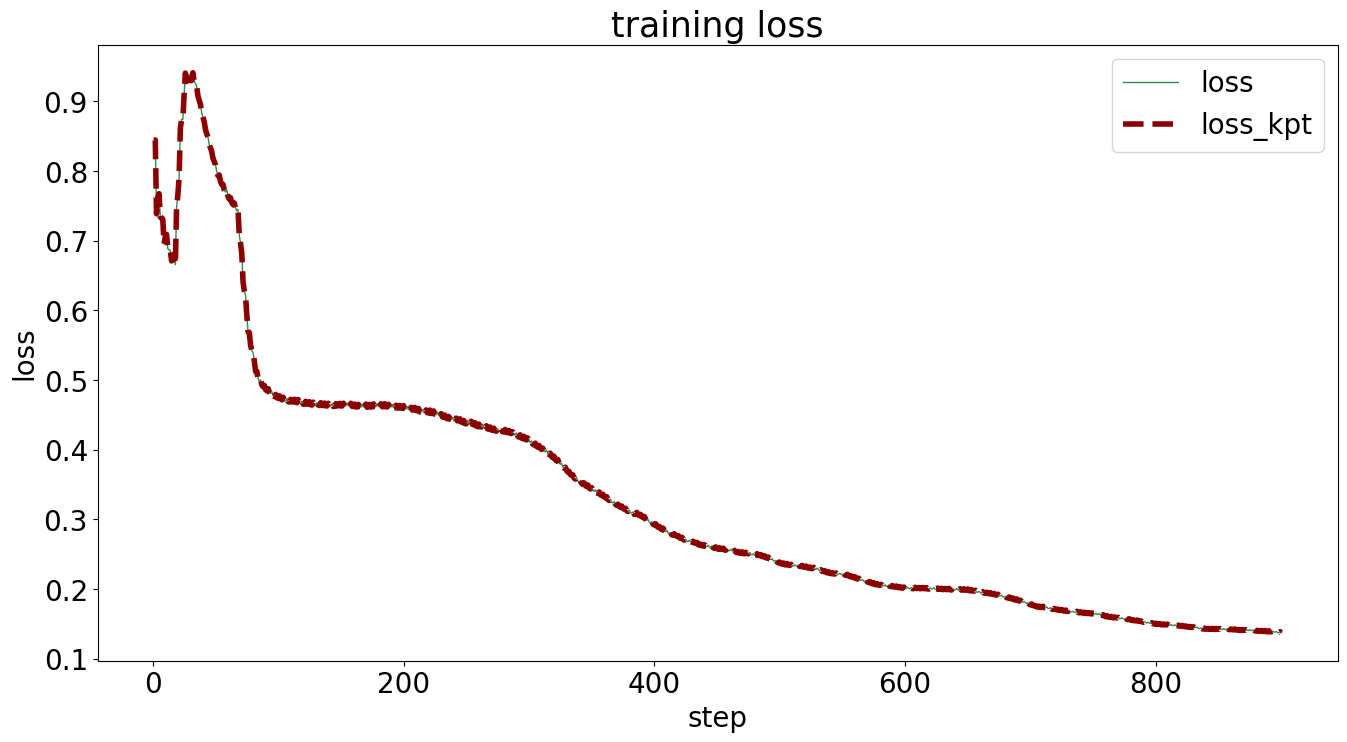

In [15]:
metrics = ['loss', 'loss_kpt']
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('training loss', fontsize=25)
plt.savefig('training_loss.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# 训练集准确率

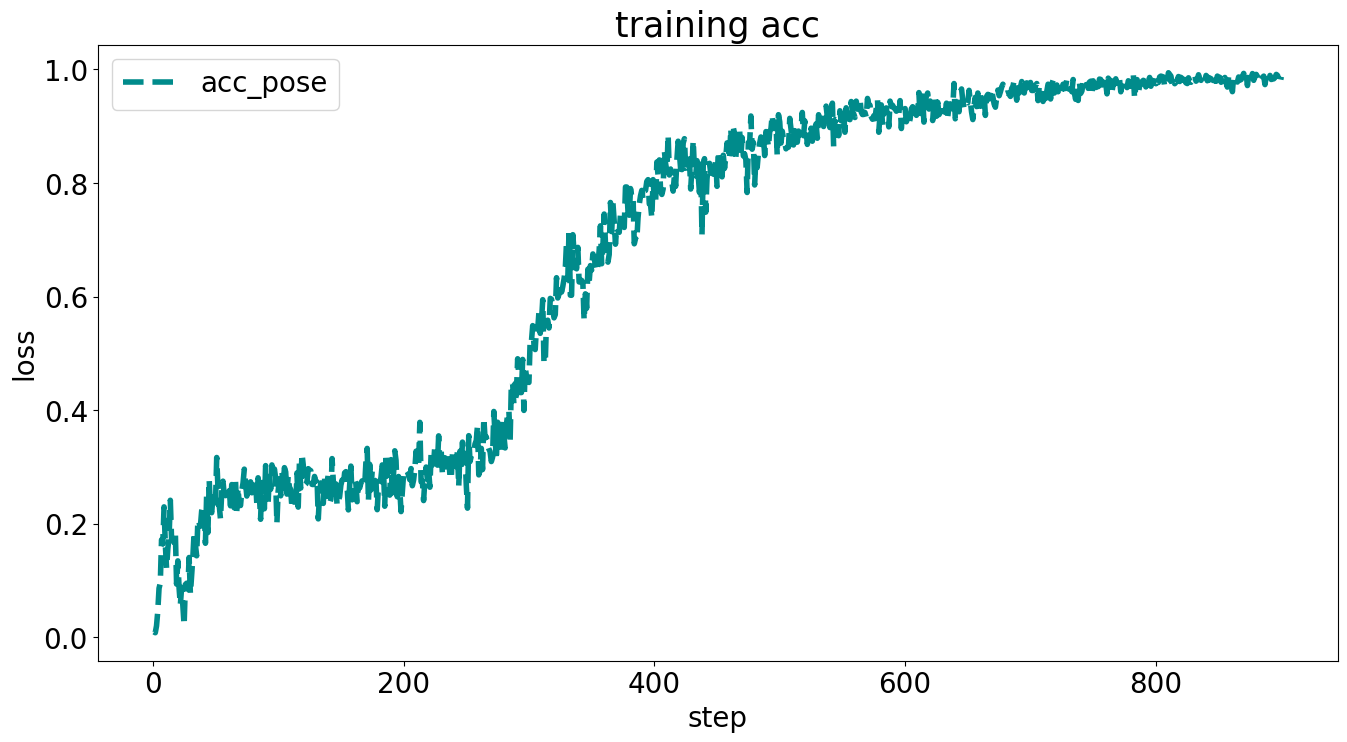

In [17]:
metrics = ['acc_pose']
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('training acc', fontsize=25)
plt.savefig('training_acc.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# 测试集评估指标-MS COCO Metric

In [18]:
df_test.columns

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')

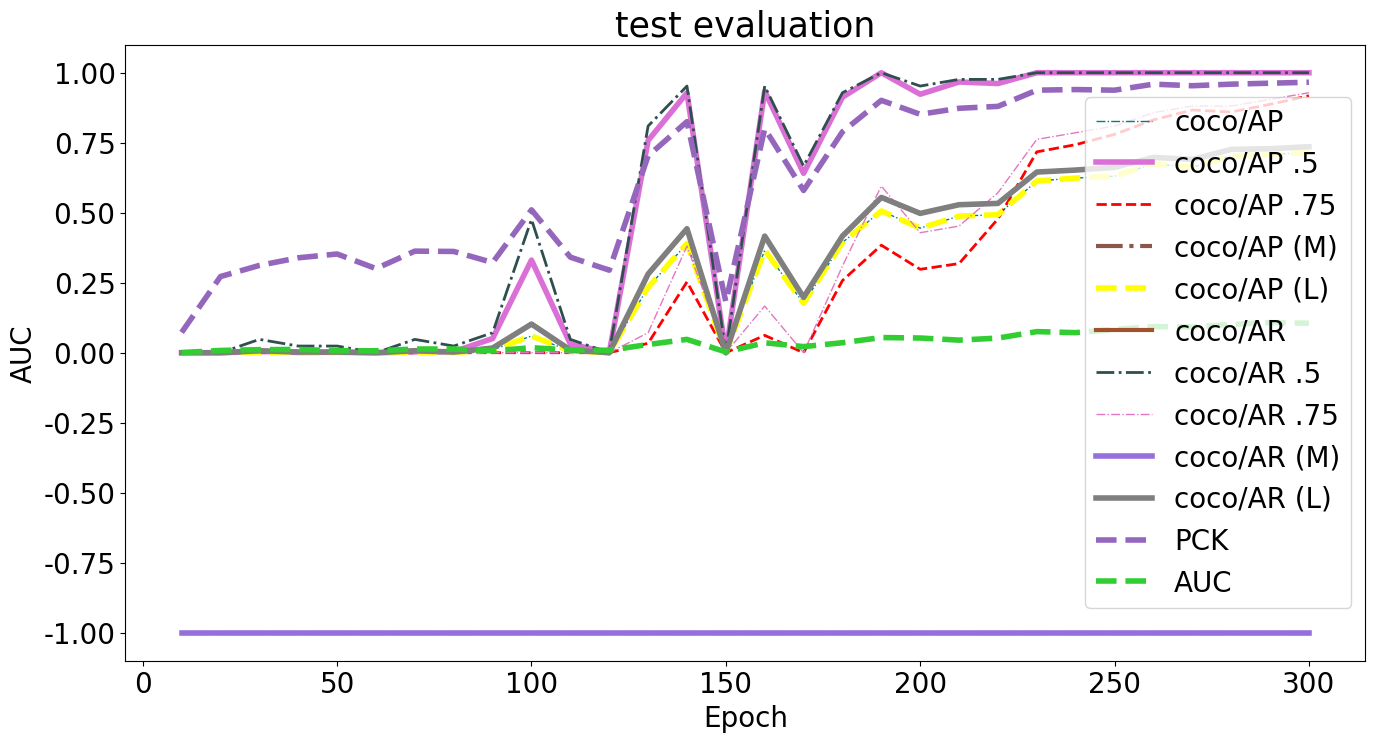

In [19]:
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC']
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('test evaluation', fontsize=25)
plt.savefig('test_evaluation.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# 测试集评估指标-NME

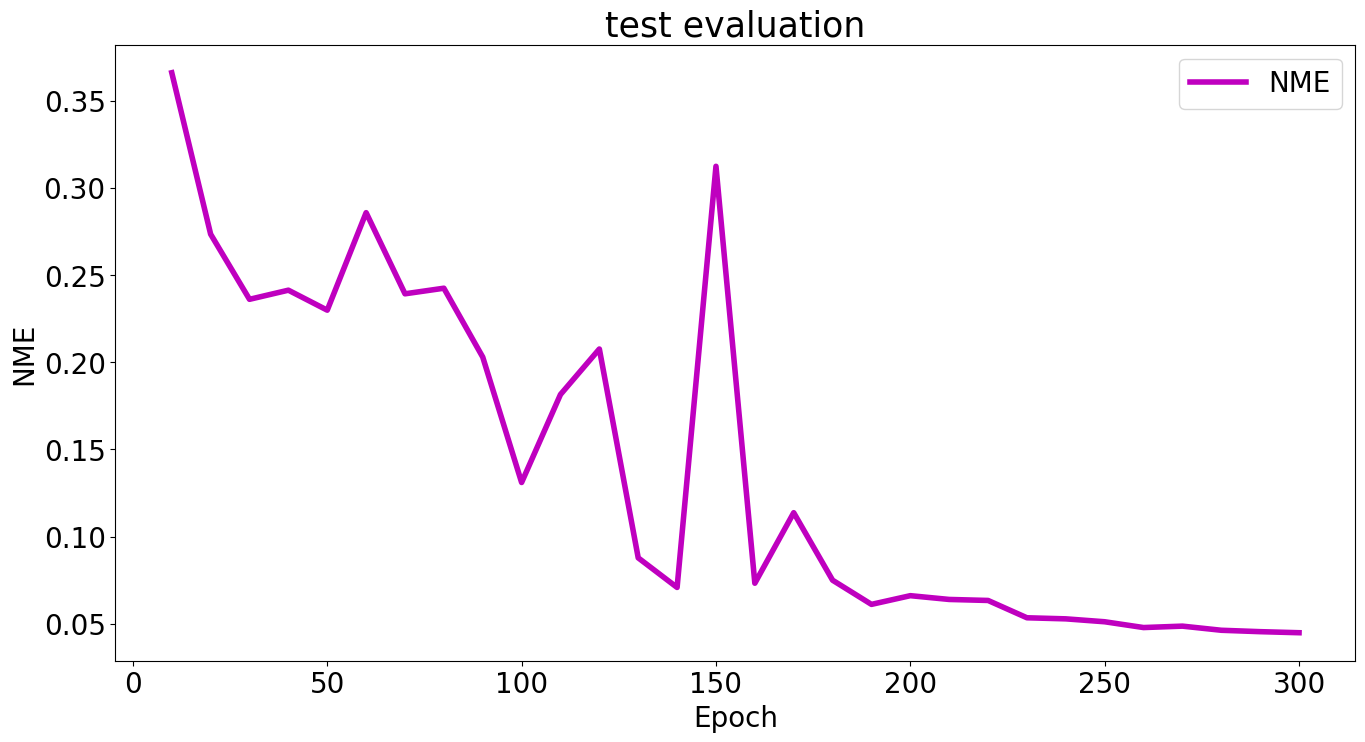

In [20]:
metrics = ['NME']
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('test evaluation', fontsize=25)
plt.savefig('test_evaluation_nme.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

# 模型精简转换

In [21]:
!python tools/misc/publish_model.py \
        work_dirs/rtmpose-s-ear/epoch_300.pth \
        checkpoint/rtmpose-s-ear-300.pth

06/05 16:20:36 - mmengine - INFO - Key `message_hub` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/05 16:20:36 - mmengine - INFO - Key `optimizer` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/05 16:20:36 - mmengine - INFO - Key `param_schedulers` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.
06/05 16:20:36 - mmengine - INFO - Key `ema_state_dict` will be removed because it is not in save_keys. If you want to keep it, please set --save-keys.


# 将自制的图像和视频添加到data文件夹下

# 单张图像-关键点检测预测

In [22]:
# RTMDet --> RTMPose
!python demo/topdown_demo_with_mmdet.py \
        data/rtmdet_tiny_triangle.py \
        checkpoint/rtmdet_tiny_ear_epoch_200_202306042305-a6e95cee.pth \
        data/rtmpose-s-ear.py \
        checkpoint/rtmpose-s-ear-300-43f9bd1a_20230605.pth \
        --input data/test_ear/ear_pic.jpg \
        --output-root outputs/Ear_RTMDet-RTMPose \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 36 \
        --thickness 30 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

Loads checkpoint by local backend from path: checkpoint/rtmdet_tiny_ear_epoch_200_202306042305-a6e95cee.pth
Loads checkpoint by local backend from path: checkpoint/rtmpose-s-ear-300-43f9bd1a_20230605.pth
06/05 16:26:07 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/leo/miniconda3/envs/openmmlab/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995026/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/leo/Code/MMPose_Tutorials/2023/0524/mmpose/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized for visualization. This may cause discrepancy between the keypoint scores and the 1D heatmaps.
  warnings.warn('The predicted simcc values are normaliz

# 视频-关键点检测预测

In [28]:
!pip install opencv-contrib-python -i https://pypi.tuna.tsinghua.edu.cn/simple
# RTMDet --> RTMPose
!python demo/topdown_demo_with_mmdet.py \
        data/rtmdet_tiny_triangle.py \
        checkpoint/rtmdet_tiny_ear_epoch_200_202306042305-a6e95cee.pth \
        data/rtmpose-s-ear.py \
        checkpoint/rtmpose-s-ear-300-43f9bd1a_20230605.pth \
        --input data/test_ear/ear_vid.mp4 \
        --output-root outputs/ear_Video \
        --device cuda:0 \
        --bbox-thr 0.5 \
        --kpt-thr 0.5 \
        --nms-thr 0.3 \
        --radius 16 \
        --thickness 10 \
        --draw-bbox \
        --draw-heatmap \
        --show-kpt-idx

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 10.3 MB/s eta 0:00:0000:0100:01
Loads checkpoint by local backend from path: checkpoint/rtmdet_tiny_ear_epoch_200_202306042305-a6e95cee.pth
Loads checkpoint by local backend from path: checkpoint/rtmpose-s-ear-300-43f9bd1a_20230605.pth
06/05 16:39:48 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.
/home/leo/miniconda3/envs/openmmlab/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343995026/work/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/leo/Code/MMPose_Tutorials/2023/0524/mmpose/mmpose/models/heads/coord_cls_heads/rtmcc_head.py:217: UserWarning: The predicted simcc values are normalized